<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
<br>
ALUNO: Fábio Elias da Silva</h3>


<p>
No trabalho de (Moraes et al., 2011) uma das conclusões aponta “interações estatisticamente significantes entre a área de localização do domicílio e as seguintes variáveis: sexo, cor/raça, morbidade autorreferida, posse de bens básicos e percentual de domicílios adequados quanto a qualidade de moradia”. O trabalho de (Melo et al., 2019), aponta que a acurácia do auto relato é relevante para pesquisas feitas no contexto municipal do Acre. Já o trabalho (Tavares et al., 2019) aponta que “a presença de duas ou mais morbidades e a associação com variáveis so- cioeconômicas e de saúde demonstram a necessidade de ações de monitoramento e controle desses fatores entre idosos nessa condição”. Por fim, o trabalho de (Galdino, 2019) discorre sobre a relevância de analisar as condições crônicas que consome a maior parte dos recursos destinados ao tratamento destas doenças. 
</p>
<p>
A conclusão do parágrafo anterior é que as informações autorreferidas são relevantes para avaliação do cenário de custo da saúde e o trabalho de Galdino, apesar de objetivar especifcamente as internações, possui correlação com as morbidades autorreferidas. O alinhamento através do agrupamento dos capítulos do CID 10 talvez permita identificar variáveis importantes sobre o custo e sobre a prevenção das doenças evitando a quadros agudos. A ressalva é que apensar da aparente correlação entre os dados, a premissa clínica deve ser considerada e o presente trabalho foca apenas na correlação entre os dados.
A partir dessas considerações, utilizando a técnica dos 5-Ws, o presente trabalho responde as seguintes questões:
</p>
<p>
(Why?) Por que esse problema é importante? 
Porque avaliar as morbidades autorreferidas permite traçar um panorama sobre condicionantes de saúde de uma população. Além disso, cruzar morbidades autorreferidas com o custo de morbidades através pode elucidar importantes variáveis de observações para o PSF.
</p>
<p>
(Who?) De quem são os dados analisados? 
Os dados de custo das morbidades por internações são de origem do SUS. E os dados de morbidades autorreferidas foram gerados a partir do modelo de informação do PSF
</p>
<p>
(What?): Quais os objetivos com essa análise?
Traçar um panorama das informações e suas correlações e avaliar o modelo de dados proposto pelo Sistema Único de Saúde (SUS) para o Programa de saúde da família (PSF) e identificar variáveis que sejam relevantes para a criação de modelos de Machine Learn (ML).
</p>
<p>
(When?): Qual o período está sendo analisado? 
Os dados de custo das morbidades por internações são de origem do SUS são do período de 2016 a 2017. E os dados de morbidades autorreferidas foram gerados a partir do modelo de informação do PSF é uma base de desenvolvimento e a data de coleta não é relevante 
    
    
   
<h3>Processamento/Tratamento de Dados</h3><br>
<p>
A ferramenta escolhida para o processamento de dados foi o python (Python, n.d.) na versão jupyter/datascience-notebook:latest, disponível em (Docker Hub, n.d.). Os fontes do projeto foram publicados no controlador de versão github. Para facilitar a montagem do ambiente, foi utilizada a estratégia de container através da ferramenta Docker disponível em (Docker, n.d.). Explicando de forma simplificada, o Docker cria um ambiente operacional com os requisitos específicos e mínimos para execução de um determinado ambiente. A estrutura do projeto tem as seguintes pastas:
</p>    

* **dataset:** contém os datasets utilizados disponiveis em: https://drive.google.com/drive/folders/10AvFcaHCenNWJMeaXLyNpiQ9H6NWczae?usp=sharing
* **docker_jupyter:** contém os arquivos de configuração do ambiente;
* **fontes:** contém os arquivos de codificação;

<p>
Para criar o mesmo ambiente utilizado no projeto é preciso instalar o Docker; no Windows deve-se instalar o Docker Desktop e no Linux baixar e instalar o Docker em acordo com a distribuição. Com o Docker instalado, deve-se acessar a pasta docker_jupyter do projeto e executar o comando “docker-compose up -d --build”. Após o término da montagem do ambiente executada pelo comando de build, basta abrir o browser e digitar a ULR http://127.0.0.1:8888/ para executar o Jupyter.
</p>


In [45]:
# Importação das bibliotecas necessárias para o projeto.
import numpy as np, array
import pandas as pd
from time import time
import datetime 
import math 
import gc
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import visuals as vs
from IPython.display import display 
import matplotlib.pyplot as plt

sns.set() 
# Exibição amigável para notebooks
%matplotlib inline

global column_idenficadores, column_dataset, column_info_auto, column_morbidade, colunas_relevantes_por_sexo, colunas_relevantes_por_faixa_etaria


#definição das funções a serem utilizadas

def calcular_idade(born):
    """ Calcula a idade com base na data de nascimento """             
    today = datetime.date.today()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(year=today.year, day=born.day-1)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

def calcular_faixa_etaria(born, age):
    """ Calcula a faixa etaria em Crianca, Joven, Adulto, Idoso. Objetivo e nao ter muitas faixas etarias """         
    if age is None:
        age = calcular_idade(born);

    # apos calcular a idade, classifica a pessoa com a idade correta:
    if age <= 11:
        return 0;
    elif 11 < age <= 20:
        return 1;
    elif 20 < age <= 40:
        return 2;    
    elif 40 < age <= 60:
        return 3;        
    else:
        return 4;

def transformar_cor_pele(value):
    """ Adequa a cor da pela entre os dataframes """     
    if value == 3:
        return 4
    elif value == 4:
        return 3;
    else:
        return value;  
    
def enconding_values(value):
    """ Verificar se um valor esta preenchido e retornar 0 ou 1 """ 
    if value == 1 or value == 0:
        return value
    if value is None or value != value:
        return 0;
    else:
        return 1;      
    
def exibe_grafico_barra(df_graf, legenda, x_label, y_label, titulo):
    """ funcao generia para exibir um grafico de barra """        
    graf01=df_graf.plot(kind= 'bar')
    plt.legend(legenda, loc='upper center', shadow=True)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(titulo)

def fit_min_max_scaler(df_graf, columns):
    """ Inicialização do aplicador de escala e aplicação aos atributos """
    scaler = MinMaxScaler() 
    df_graf[columns] = scaler.fit_transform(df_graf[columns])
    return df_graf

def exibir_grafico_box_plot(df_graf):
    """ Exibe um grafico de box plot a patir de um data frame, o data frame tem que conter a coluna All """
    fig5, ax5 = plt.subplots()
    ax5.set_title('Horizontal Boxes')    
    Q1 = df_graf['All'][:1].quantile(0.25)
    Q2 = df_graf['All'][:1].quantile(0.50)
    Q3 = df_graf['All'][:1].quantile(0.75)
    IQR = Q3 - Q1
    LI = Q1 - ( 1.5 * IQR)
    LS = Q3 + ( 1.5 * IQR)
    df_graf.drop(df_graf[(df_graf.All >= LI) & (df_graf.All <= LS)].index, inplace=True)
    ax5.boxplot(df_graf['All'][:-1], patch_artist=True, labels=['All'], showmeans=True)  

def exbir_grafico_morb_autorreferida(df, coluna_agrupamento, colunas, x_label, y_label):
    """ exibe o grafico de informacoes autorreferidas """
    colunas = [coluna_agrupamento] + colunas
    dft_un = df[colunas].melt(id_vars=[coluna_agrupamento], var_name='INFO', value_name=x_label)
    df_graf = dft_un.pivot_table(x_label, index='INFO', columns=coluna_agrupamento, aggfunc=[lambda x: x.sum()], margins=True)['<lambda>']
    titulo = "{0} X {1} Morbidades autorreferidas ".format(coluna_agrupamento, y_label)
    exibe_grafico_barra(df_graf, df_graf.columns, x_label, y_label, titulo)
    return df_graf
    
def exbir_grafico_custo_morb(df_morbidade_autorreferida_graf, coluna_agrupamento, colunas, x_label, y_label):
    """ exibe o grafico de custo de inernacao das morbidades  """    
    colunas = [coluna_agrupamento] + colunas
    df_graf = df_morbidade_autorreferida_graf.pivot_table('VAL_TOT', index=coluna_agrupamento, columns='IND_CUSTO_MEDIO', aggfunc=[lambda x: x.sum()/1000000], margins=True)['<lambda>']
#     display(df_graf)
    titulo = "{0} X {1} Custo de internações em milhões ".format(coluna_agrupamento, y_label)
    exibe_grafico_barra(df_graf, ["abaixo da média = 0","acima da média = 1"], x_label, y_label, titulo)

    

#Carregar os data frames de parâmetros
df_capitulo_cid_morbidades = pd.read_csv("../dataset/_GRUPO_MORBIDADE_202004182151.csv", sep = ';')
df_capitulo_cid_morbidades.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CAPITULO_CID               22 non-null     int64  
 1   DESCRICAO_GRUPO_MORBIDADE  22 non-null     object 
 2   FAIXA_CID_10               22 non-null     object 
 3   BODY_SYSTEM                16 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 832.0+ bytes


### Dataframe de custo de morbidades (df_custo_morbidades_cid10)
<p>
Extraído do projeto de (Galdino, 2019) que por sua vez extraiu os dados do Sistema Único de Saúde (DATASUS), segundo a autora, os dados estão relacionados às “características demográficas e internações realizadas nos 26 estados do Brasil e Distrito Federal. Neste estudo, foram avaliados cerca de 7 milhões de registros referentes aos anos de 2016 e 2017”. A descrição dos dados é apresentada na saída do console executada pelo script abaixo abaixo:
</p>

In [46]:
#Carregar o data set de custo
df_custo_morbidades_cid10 = pd.read_csv("../dataset/BASE_DADOS_FINAL4.csv", sep = ',')
df_custo_morbidades_cid10.info()
display(df_custo_morbidades_cid10.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6152865 entries, 0 to 6152864
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   UF           int64  
 1   SEXO         int64  
 2   QT_DIARIAS   int64  
 3   VAL_SH       float64
 4   VAL_SP       float64
 5   VAL_SADT     float64
 6   VAL_RN       float64
 7   VAL_ACOMP    float64
 8   VAL_ORTP     float64
 9   VAL_SANGUE   float64
 10  VAL_SADTSR   float64
 11  VAL_TRANSP   float64
 12  VAL_OBSANG   float64
 13  VAL_PED1AC   float64
 14  VAL_TOT      float64
 15  VAL_UTI      float64
 16  DIAG_PRINC   object 
 17  IDADE        int64  
 18  INSTRU       int64  
 19  RACA_COR     int64  
 20  BODY_SYSTEM  int64  
dtypes: float64(13), int64(7), object(1)
memory usage: 985.8+ MB


,UF,SEXO,QT_DIARIAS,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,...,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,DIAG_PRINC,IDADE,INSTRU,RACA_COR,BODY_SYSTEM
0,35,3,21,1247.83,96.70,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1344.53,0.0,E830,36,0,1,3
1,25,1,10,330.00,49.15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,379.15,0.0,E830,23,0,4,3
2,31,1,2,131.92,23.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,155.42,0.0,E830,17,0,3,3
3,33,1,7,171.92,23.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195.42,0.0,E830,87,0,1,3
4,31,1,26,1033.96,100.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1134.86,0.0,E830,60,0,99,3


### Seleção e tratamento inicial das colunas (df_custo_morbidades_cid10)

In [47]:
#inserção da coluna FAIXA_ETARIA pela idade
df_custo_morbidades_cid10['FAIXA_ETARIA'] = df_custo_morbidades_cid10['IDADE'].apply(lambda x: calcular_faixa_etaria(0,x));

#remover colunas que não serão utilizadas no processamento
if 'VAL_SH' in df_custo_morbidades_cid10.columns:
    df_custo_morbidades_cid10.drop(['UF','VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG', 'VAL_PED1AC', 'DIAG_PRINC', 'INSTRU'],axis=1,inplace = True)

df_custo_morbidades_cid10.info()


#transorfamar colunas em categorias
df_custo_morbidades_cid10['SEXO']=df_custo_morbidades_cid10.SEXO.astype("object")
df_custo_morbidades_cid10['RACA_COR']=df_custo_morbidades_cid10.RACA_COR.astype("object")
df_custo_morbidades_cid10['FAIXA_ETARIA']=df_custo_morbidades_cid10.FAIXA_ETARIA.astype("object")
df_custo_morbidades_cid10['BODY_SYSTEM']=df_custo_morbidades_cid10.BODY_SYSTEM.astype("object")


#Resumo informações das colunas
df_custo_morbidades_cid10.describe(include=[np.number]).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6152865 entries, 0 to 6152864
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   SEXO          int64  
 1   QT_DIARIAS    int64  
 2   VAL_TOT       float64
 3   VAL_UTI       float64
 4   IDADE         int64  
 5   RACA_COR      int64  
 6   BODY_SYSTEM   int64  
 7   FAIXA_ETARIA  int64  
dtypes: float64(2), int64(6)
memory usage: 375.5 MB


,count,mean,std,min,25%,50%,75%,max
QT_DIARIAS,6152865.0,7.228090,9.425929,0.0,2.0,3.00,8.00,358.00
VAL_TOT,6152865.0,1878.899282,4499.084127,0.0,376.8,672.47,1484.69,230264.99
VAL_UTI,6152865.0,241.052358,1332.020901,0.0,0.0,0.00,0.00,150045.90
IDADE,6152865.0,52.283573,23.231016,1.0,37.0,56.00,70.00,131.00


### Criação da coluna IND_CUSTO_MEDIO (df_custo_morbidades_cid10)
<p>
Criação da coluna IND_CUSTO_MEDIO para avaliar graficamente a relação do custo médio com os dados categóricos como sexo, raça cor, faixa etária e morbidade "BODY_SYSTEM"
</p>

'## MÉDIA DE CUSTO'

1878.899282488732

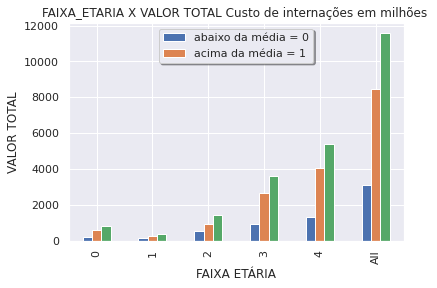

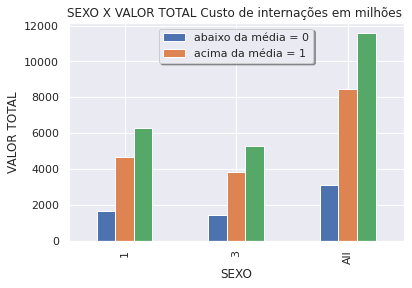

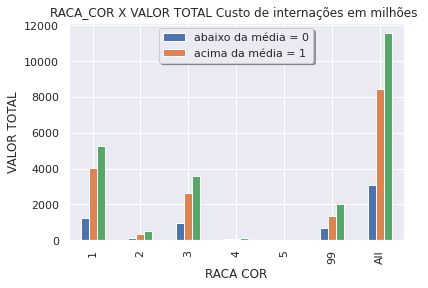

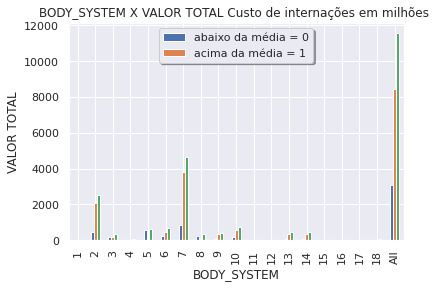

In [48]:
#criacao da coluna media e exibicao dos graficos para avaliações
media_custo = df_custo_morbidades_cid10['VAL_TOT'].mean()
display("## MÉDIA DE CUSTO")
display(media_custo)
df_custo_morbidades_cid10['IND_CUSTO_MEDIO'] = df_custo_morbidades_cid10.VAL_TOT.apply(lambda x: 1 if x > media_custo else 0)

colunas_grafico = ['VAL_TOT', 'VAL_UTI', 'QT_DIARIA']
exbir_grafico_custo_morb(df_custo_morbidades_cid10, 'FAIXA_ETARIA', colunas_grafico, 'FAIXA ETÁRIA', "VALOR TOTAL")
exbir_grafico_custo_morb(df_custo_morbidades_cid10, 'SEXO', colunas_grafico, 'SEXO', "VALOR TOTAL")
exbir_grafico_custo_morb(df_custo_morbidades_cid10, 'RACA_COR', colunas_grafico, 'RACA COR', "VALOR TOTAL")
exbir_grafico_custo_morb(df_custo_morbidades_cid10, 'BODY_SYSTEM', colunas_grafico, 'BODY_SYSTEM', "VALOR TOTAL")


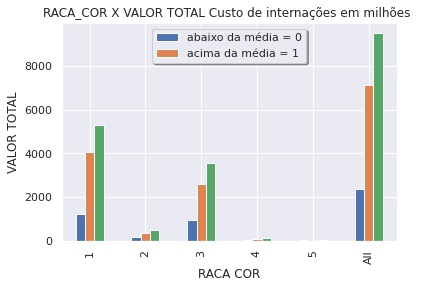

In [49]:
#REMOVER A RACA COR 99 QUE NÃO POSSUI CORRESPONDENTE NO DATA FRAME DE MORBIDADES AUTORREFERIDAS
df_custo_morbidades_cid10.drop(df_custo_morbidades_cid10[df_custo_morbidades_cid10.RACA_COR == 99].index, inplace=True)
exbir_grafico_custo_morb(df_custo_morbidades_cid10, 'RACA_COR', colunas_grafico, 'RACA COR', "VALOR TOTAL")

In [79]:
#Definição das colunas a serem utilizadas nos dataframes
column_idenficadores = ['UUID_C','IDADE', 'GENERO', 'COR_PELE', 'FAIXA_ETARIA', 'FREQUENTA_ESCOLA']

column_dataset = ['POSSUI_DEFICIENCIA', 'PROGRAMA_SOCIAL', 'ATIVIDADE_ESPORTIVA', 'AIDS', 'ALCOOLISMO', 'DESNUTRICAO', 'DIABETES', 'DOENCA_CARDIACA', 'DOENCA_RESPIRATORIA', 'DOENCA_RENAL', 'EPILEPSIA', 'GRAVIDEZ', 'HANSENIASE', 'HIPERTENSAO', 'IDOSO_DEPENDENTE', 'OBESIDADE', 'DOENCA_MENTAL', 'TABAGISMO', 'TUBERCULOSE']
column_info_auto = ['PROGRAMA_SOCIAL', 'ATIVIDADE_ESPORTIVA', 'AIDS', 'ALCOOLISMO', 'DESNUTRICAO', 'DIABETES', 'DOENCA_CARDIACA', 'DOENCA_RESPIRATORIA', 'DOENCA_RENAL', 'EPILEPSIA', 'GRAVIDEZ', 'HANSENIASE', 'HIPERTENSAO', 'IDOSO_DEPENDENTE', 'OBESIDADE', 'DOENCA_MENTAL', 'TABAGISMO', 'TUBERCULOSE']
colunas_relevantes_grafico = column_info_auto


legenda_graf_barra_genero = ("FEMININO=F", "MASCULINO=M", "TOTAL")
legenda_graf_barra_faixa_etaria = ("FEMININO=F", "MASCULINO=M", "TOTAL")
legenda_graf_barra_cor_pele = ("FEMININO=F", "MASCULINO=M", "TOTAL")


#Carregar dataframe informações autorreferidas
df_morbidade_autorreferida = pd.read_csv("../dataset/CIDADAO_INFO_AUTOREFERIDA_FIT_20201125_1912.csv", sep = ';')

#display dataframe carregado
display("## Dataframe carregado")
df_morbidade_autorreferida.info()

#remover cidadaos que nao possuem sexo definido
df_morbidade_autorreferida.drop(df_morbidade_autorreferida[df_morbidade_autorreferida.GENERO == 'I'].index, inplace=True)


#Separar os dataframes para comparar os cidados que possuem informacoes autoreferidas dos que nao possuem
df_morbidade_autorreferida = df_morbidade_autorreferida.dropna(subset=column_info_auto, how='all')


#exibir informações do data frame de informações autorreferidas
display("## Dataframe de informações autorreferidas")
display(df_morbidade_autorreferida.info())
display(df_morbidade_autorreferida.head(5))
display("## TOTAL DE CIDADÃOS QUE POSSUEM ALGUMA INFORMAÇÃO AUTORREFERIDA: " + str(len(df_morbidade_autorreferida.index)))


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'## Dataframe carregado'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   UUID_C               1000000 non-null  object 
 1   IDADE                1000000 non-null  int64  
 2   GENERO               1000000 non-null  object 
 3   COR_PELE             998364 non-null   float64
 4   FAIXA_ETARIA         1000000 non-null  int64  
 5   FREQUENTA_ESCOLA     1000000 non-null  int64  
 6   POSSUI_DEFICIENCIA   1000000 non-null  int64  
 7   PROGRAMA_SOCIAL      286859 non-null   object 
 8   ATIVIDADE_ESPORTIVA  336662 non-null   object 
 9   AIDS                 364 non-null      object 
 10  ALCOOLISMO           961 non-null      object 
 11  DESNUTRICAO          145 non-null      object 
 12  DIABETES             7177 non-null     object 
 13  DOENCA_CARDIACA      2718 non-null     object 
 14  DOENCA_RESPIRATORIA  8049 non-null     object 
 15 

'## Dataframe de informações autorreferidas'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339160 entries, 13 to 999999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   UUID_C               339160 non-null  object 
 1   IDADE                339160 non-null  int64  
 2   GENERO               339160 non-null  object 
 3   COR_PELE             339160 non-null  float64
 4   FAIXA_ETARIA         339160 non-null  int64  
 5   FREQUENTA_ESCOLA     339160 non-null  int64  
 6   POSSUI_DEFICIENCIA   339160 non-null  int64  
 7   PROGRAMA_SOCIAL      286859 non-null  object 
 8   ATIVIDADE_ESPORTIVA  336662 non-null  object 
 9   AIDS                 364 non-null     object 
 10  ALCOOLISMO           961 non-null     object 
 11  DESNUTRICAO          145 non-null     object 
 12  DIABETES             7177 non-null    object 
 13  DOENCA_CARDIACA      2718 non-null    object 
 14  DOENCA_RESPIRATORIA  8049 non-null    object 
 15  DOENCA_RENAL    

None

,UUID_C,IDADE,GENERO,COR_PELE,FAIXA_ETARIA,FREQUENTA_ESCOLA,POSSUI_DEFICIENCIA,PROGRAMA_SOCIAL,ATIVIDADE_ESPORTIVA,AIDS,...,DOENCA_RENAL,EPILEPSIA,GRAVIDEZ,HANSENIASE,HIPERTENSAO,IDOSO_DEPENDENTE,OBESIDADE,DOENCA_MENTAL,TABAGISMO,TUBERCULOSE
13,FD582304-A179-4BAA-8297-0AC4E350811F,34,M,4.0,2,2,0,2020-11-25 17:42:22,2020-11-25 17:42:22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,5397F3CB-A600-4402-BB15-A0F32F031969,44,F,4.0,2,2,0,2020-11-25 17:40:18,2020-11-25 17:40:18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,49A2DB49-C7B8-4E4B-81A4-A60562D7701E,54,M,1.0,2,2,0,2020-11-25 17:26:30,2020-11-25 17:26:30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,15C2BF8B-C3A5-404C-A883-6ECBD6500014,0,F,4.0,0,2,0,2020-11-25 16:59:50,2020-11-25 16:59:50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,99368121-A2D7-4A96-A4E8-D7B791AD04B0,0,M,1.0,0,2,0,NaN,2020-11-25 16:58:58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'## TOTAL DE CIDADÃOS QUE POSSUEM ALGUMA INFORMAÇÃO AUTORREFERIDA: 339160'

### Descrição dos dataframes de cidadãos com ou sem informações autorreferidas
<p>
Informações autorreferida ou morbidade autorreferida são as morbidades e dados informadas pelo cidadão. No Programa de sáude da família (PSF), estas informações são coletadas pelo Agente Comunitário de Saúde (ACS) através da Ficha de cadastro individual durante o cadastro de um indivíduo ou atualização de seu cadastro. A ficha de cadastro é definida pelo manual de coleta de dados simplificada (<a href="http://aps.saude.gov.br/ape/esus/manual_3_2/capitulo7" title="Clique e acesse">CDS</a>) do eSUS e o dicionário de dados da ficha pode ser encontrado em: <a href="https://integracao.esusab.ufsc.br/v321/ledi/documentacao/estrutura_arquivos/dicionario-fci.html" title="Clique e acesse">e-SUS</a>. 
    
O dataframe é gerado com foco nas informações ligadas a morbidades e não contempla todo o dicionário de dados definido pelo e-SUS.

O dataframe incialmente carregado na variável df_morbidade_autorreferida. Após o carregamento, os registros que não possuam morbidade autorreferida; as colunas POSSUI_DEFICIENCIA, ATIVIDADE_ESPORTIVA,AIDS,ALCOOLISMO,DESNUTRICAO,DIABETES,DOENCA_CARDIACA,DOENCA_RESPIRATORIA,DOENCA_RENAL,EPILEPSIA,GRAVIDEZ,HANSENIASE,HIPERTENSAO,IDOSO_DEPENDENTE,OBESIDADE,DOENCA_MENTAL,TABAGISMO,TUBERCULOSE possua valor nulo.
    
* **Colunas do dataframe original:**
 * **
 * **UUID**                          int64    Identificador do cidadão (UUID gerado aleatoriamente) 
 * **IDADE**                         non-null  int64    Idade do indivíduo
 * **SEXO**                          non-null  int64    Sexo (será considerado 1 - Feminino 2 - Masculino) 
 * **COR_PELE**                      non-null  int64    Cor da pele do indivíduo 1 – Branca; 2 – Preta; 3 – Parda; 4 – Amarela; 5 – Indígena; 99 – Sem informação 
 * **FAIXA_ETARIA**                  non-null  float64  Faixa etaria do indivíduo (Criança <= 11 Joven <= 20 Adulto <= 54 Idoso)
 * **FREQUENTA_ESCOLA**              non-null  int64    Define se a pessoa frequenta escola ou não
 * **POSSUI_DEFICIENCIA**            non-null  object   Define a data da última coleta se possui alguma deficiência    
 * **PROGRAMA_SOCIAL**               non-null  object   Define a data da última coleta se participa de algum programa social
 * **ATIVIDADE_ESPORTIVA**           non-null  object   Define a data da última coleta se pratica alguma atividade esportiva
 * **Os campos abaixo definem a data última coleta da morbidade autoreferida:**
     * **AIDS**                          non-null   object 
     * **ALCOOLISMO**                    non-null   object 
     * **DESNUTRICAO**                   non-null   object 
     * **DIABETES**                      non-null   object 
     * **DOENCA_CARDIACA**               non-null   object 
     * **DOENCA_RESPIRATORIA**           non-null   object 
     * **DOENCA_RENAL**                  non-null   object 
     * **EPILEPSIA**                     non-null   object 
     * **HANSENIASE**                    non-null   object                                                                          * **GRAVIDEZ**                      non-null   object
     * **HIPERTENSAO**                   non-null   object 
     * **IDOSO_DEPENDENTE**              non-null   object 
     * **OBESIDADE**                     non-null   object 
     * **DOENCA_MENTAL**                 non-null   object 
     * **TABAGISMO**                     non-null   object 
     * **TUBERCULOSE**                   non-null   object 
   
</p>

In [80]:
#Adequação da faixa etaria ao mesmo padrao para os data frames
df_morbidade_autorreferida['FAIXA_ETARIA'] = df_morbidade_autorreferida['IDADE'].apply(lambda x: calcular_faixa_etaria(0,x));

#criar a coluna de controla da informacao autorreferida
df_morbidade_autorreferida['IND_POSSUI_INFO_AUTOREFERIDA'] = 1

#Criar uma nova coluna "SEXO" igualando os dataframes os valores da coluna "GENERO" serão transformandos M - para 1 e F para 3
if 'GENERO' in df_morbidade_autorreferida.columns:
    df_morbidade_autorreferida['SEXO'] = df_morbidade_autorreferida.GENERO.apply(lambda x: 1 if x == 'M' or x == 1 else 3) 
    
#Criar uma nova coluna "RACA_COR" igualando os dataframes; os valores da coluna "COR_PELE" serão transformandos 3 (Amarela) - para 4 e 4 (Parda) para 3
if 'COR_PELE' in df_morbidade_autorreferida.columns:
    df_morbidade_autorreferida['RACA_COR'] = df_morbidade_autorreferida.COR_PELE.apply(transformar_cor_pele) 

##Transformar as colunas com valores em 0 ou 1 para contar os valores e apresentar o gárfico
df_morbidade_autorreferida[column_info_auto] = df_morbidade_autorreferida[column_info_auto].apply(lambda x: x.apply(enconding_values));

#Setar como 1 as informacoes autorreferidas
df_morbidade_autorreferida['SEXO']=df_morbidade_autorreferida.SEXO.astype("int64")
df_morbidade_autorreferida['SEXO']=df_morbidade_autorreferida.SEXO.astype("object")
df_morbidade_autorreferida['RACA_COR']=df_morbidade_autorreferida.RACA_COR.astype("int64")
df_morbidade_autorreferida['RACA_COR']=df_morbidade_autorreferida.RACA_COR.astype("object")
df_morbidade_autorreferida['FAIXA_ETARIA']=df_morbidade_autorreferida.FAIXA_ETARIA.astype("object")
df_morbidade_autorreferida[column_info_auto+['IND_POSSUI_INFO_AUTOREFERIDA']]=df_morbidade_autorreferida[column_info_auto + ['IND_POSSUI_INFO_AUTOREFERIDA']].astype("int64")

df_morbidade_autorreferida.info()

#liberar memoria deletando o dataframe original
# del df_original
# gc.collect()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 339160 entries, 13 to 999999
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   UUID_C                        339160 non-null  object 
 1   IDADE                         339160 non-null  int64  
 2   GENERO                        339160 non-null  object 
 3   COR_PELE                      339160 non-null  float64
 4   FAIXA_ETARIA                  339160 non-null  object 
 5   FREQUENTA_ESCOLA              339160 non-null  int64  
 6   POSSUI_DEFICIENCIA            339160 non-null  int64  
 7   PROGRAMA_SOCIAL               339160 non-null  int64  
 8   ATIVIDADE_ESPORTIVA           339160 non-null  int64  
 9   AIDS                          339160 non-null  int64  
 10  ALCOOLISMO                    339160 non-null  int64  
 11  DESNUTRICAO                   339160 non-null  int64  
 12  DIABETES                      339160 non-nu

Text(0.5, 1.0, 'GRÁFICO - QTDE MORBIDADES AUTORREFERIDAS POR RACA_COR')

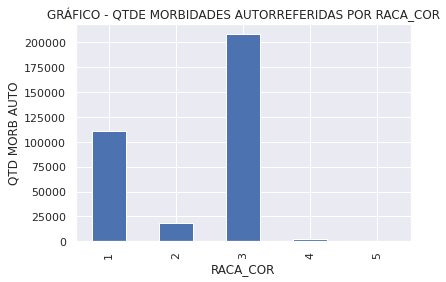

In [81]:
# Grafico de RACA COR etaria por total de morbidades autorreferidas
graf02=df_morbidade_autorreferida.groupby(by="RACA_COR", dropna=False).sum()['IND_POSSUI_INFO_AUTOREFERIDA'].plot(kind= 'bar')
plt.ylabel("QTD MORB AUTO")
plt.title ("GRÁFICO - QTDE MORBIDADES AUTORREFERIDAS POR RACA_COR")


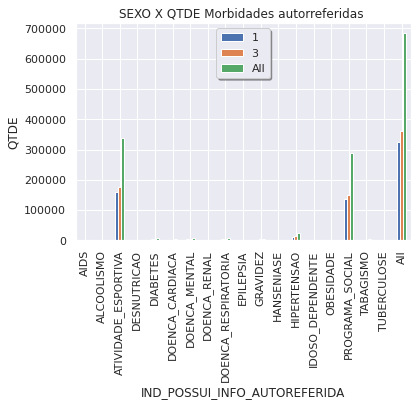

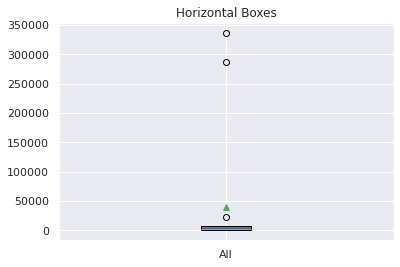

In [82]:
##GRAFICO 01 INFO AUTOREFERIDA X GENERO
df = exbir_grafico_morb_autorreferida(df_morbidade_autorreferida, 'SEXO', colunas_relevantes_grafico, 'IND_POSSUI_INFO_AUTOREFERIDA', "QTDE")
exibir_grafico_box_plot(df)

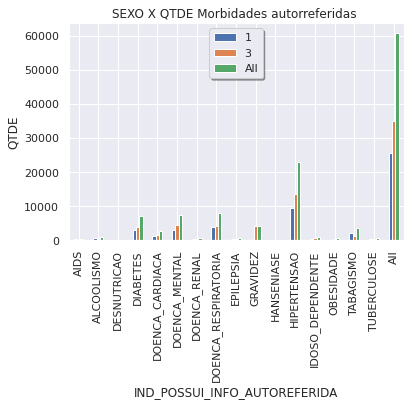

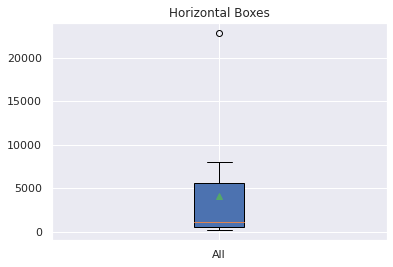

In [83]:
#Remover colunas que nao relevantes se existirem
if 'FREQUENTA_ESCOLA' in df_morbidade_autorreferida.columns:
    colunas_remocao_comuns = ['UUID_C', 'FREQUENTA_ESCOLA', 'POSSUI_DEFICIENCIA', 'ATIVIDADE_ESPORTIVA', 'PROGRAMA_SOCIAL', 'GENERO', 'COR_PELE']
    df_morbidade_autorreferida = df_morbidade_autorreferida.drop(columns=colunas_remocao_comuns)
    colunas_relevantes_grafico = ['AIDS', 'ALCOOLISMO', 'DESNUTRICAO', 'DIABETES', 'DOENCA_CARDIACA', 'DOENCA_RESPIRATORIA', 'DOENCA_RENAL', 'EPILEPSIA', 'GRAVIDEZ', 'HANSENIASE', 'HIPERTENSAO', 'IDOSO_DEPENDENTE', 'OBESIDADE', 'DOENCA_MENTAL', 'TABAGISMO', 'TUBERCULOSE']

df = exbir_grafico_morb_autorreferida(df_morbidade_autorreferida, 'SEXO', colunas_relevantes_grafico, 'IND_POSSUI_INFO_AUTOREFERIDA', "QTDE")
exibir_grafico_box_plot(df)

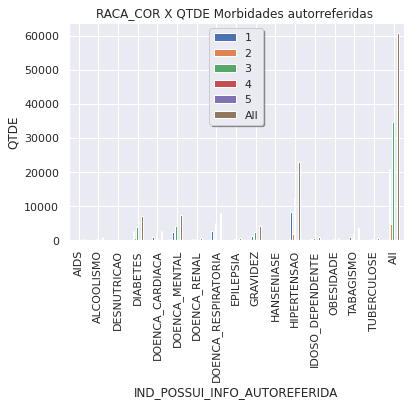

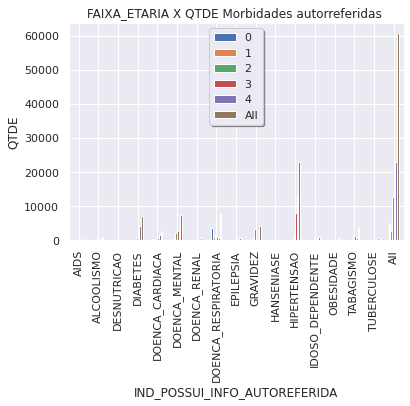

In [55]:
##GRAFICO 01 INFO AUTOREFERIDA X GENERO
df = exbir_grafico_morb_autorreferida(df_morbidade_autorreferida, 'RACA_COR', colunas_relevantes_grafico, 'IND_POSSUI_INFO_AUTOREFERIDA', "QTDE")
df = exbir_grafico_morb_autorreferida(df_morbidade_autorreferida, 'FAIXA_ETARIA', colunas_relevantes_grafico, 'IND_POSSUI_INFO_AUTOREFERIDA', "QTDE")

Text(0.5, 1.0, 'GRÁFICO - QTDE MORBIDADES AUTORREFERIDAS POR FAIXA ETARIA')

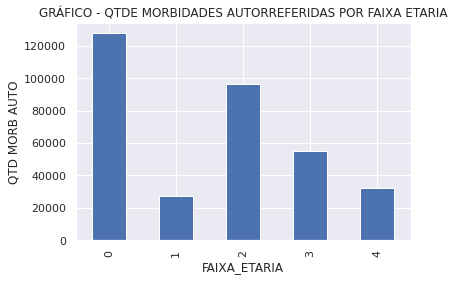

In [56]:
#CRIA GRAFICO PARA AVALIAR A RAÇA COR
graf04=df_morbidade_autorreferida.groupby(by="FAIXA_ETARIA", dropna=False).sum()['IND_POSSUI_INFO_AUTOREFERIDA'].plot(kind= 'bar')
plt.ylabel("QTD MORB AUTO")
plt.title ("GRÁFICO - QTDE MORBIDADES AUTORREFERIDAS POR FAIXA ETARIA")


In [103]:

df_morbidade_autorreferida_raw = pd.DataFrame(data = df_morbidade_autorreferida)
#Remover colunas de morbdiades autorreferidas nao consideradas na analise
if 'AIDS' in df_morbidade_autorreferida.columns:
    colunas_remocao = ['AIDS', 'DOENCA_RENAL', 'ALCOOLISMO', 'IDOSO_DEPENDENTE', 'TABAGISMO', 'HANSENIASE', 'TUBERCULOSE', 'GRAVIDEZ']
    df_morbidade_autorreferida_raw = df_morbidade_autorreferida_raw.drop(columns=colunas_remocao)


# unificar as colunas DESNUTRICAO e DIABETES E RENOMEAR PARA BODY_SYSTEM_3
if 'DESNUTRICAO' in df_morbidade_autorreferida_raw.columns:
    df_morbidade_autorreferida_raw['BODY_SYSTEM_3'] = df_morbidade_autorreferida_raw['DESNUTRICAO'].combine_first(df_morbidade_autorreferida_raw['DIABETES'])

# unificar as colunas DOENCA CARDIACA HIPERTENSAO BODY_SYSTEM_7
if 'HIPERTENSAO' in df_morbidade_autorreferida_raw.columns:
    df_morbidade_autorreferida_raw['BODY_SYSTEM_7'] = df_morbidade_autorreferida_raw['HIPERTENSAO'].combine_first(df_morbidade_autorreferida_raw['DOENCA_CARDIACA'])

#Remover colunas de morbdiades autorreferidas nao consideradas na analise
if 'DESNUTRICAO' in df_morbidade_autorreferida.columns:
    colunas_remocao = ['DESNUTRICAO', 'DIABETES', 'HIPERTENSAO', 'DOENCA_CARDIACA']
    df_morbidade_autorreferida_raw = df_morbidade_autorreferida_raw.drop(columns=colunas_remocao)


df_morbidade_autorreferida_raw.rename(columns={'OBESIDADE':'BODY_SYSTEM_4', 'DOENCA_MENTAL':'BODY_SYSTEM_5', 'EPILEPSIA' : 'BODY_SYSTEM_6', 'DOENCA_RESPIRATORIA': 'BODY_SYSTEM_8'}, inplace=True)

df_morbidade_autorreferida_raw['BODY_SYSTEM_3']=df_morbidade_autorreferida_raw.BODY_SYSTEM_3.astype("uint8")
df_morbidade_autorreferida_raw['BODY_SYSTEM_4']=df_morbidade_autorreferida_raw.BODY_SYSTEM_4.astype("uint8")
df_morbidade_autorreferida_raw['BODY_SYSTEM_5']=df_morbidade_autorreferida_raw.BODY_SYSTEM_5.astype("uint8")
df_morbidade_autorreferida_raw['BODY_SYSTEM_6']=df_morbidade_autorreferida_raw.BODY_SYSTEM_6.astype("uint8")
df_morbidade_autorreferida_raw['BODY_SYSTEM_7']=df_morbidade_autorreferida_raw.BODY_SYSTEM_7.astype("uint8")
df_morbidade_autorreferida_raw['BODY_SYSTEM_8']=df_morbidade_autorreferida_raw.BODY_SYSTEM_8.astype("uint8")

df_morbidade_autorreferida_raw.info()
df_morbidade_autorreferida_dummies = pd.get_dummies(df_morbidade_autorreferida_raw)
# df_morbidade_autorreferida_dummies.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 339160 entries, 13 to 999999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   IDADE                         339160 non-null  int64 
 1   FAIXA_ETARIA                  339160 non-null  object
 2   BODY_SYSTEM_8                 339160 non-null  uint8 
 3   BODY_SYSTEM_6                 339160 non-null  uint8 
 4   BODY_SYSTEM_4                 339160 non-null  uint8 
 5   BODY_SYSTEM_5                 339160 non-null  uint8 
 6   IND_POSSUI_INFO_AUTOREFERIDA  339160 non-null  int64 
 7   SEXO                          339160 non-null  object
 8   RACA_COR                      339160 non-null  object
 9   BODY_SYSTEM_3                 339160 non-null  uint8 
 10  BODY_SYSTEM_7                 339160 non-null  uint8 
dtypes: int64(2), object(3), uint8(6)
memory usage: 27.5+ MB


### Alinahmento do dataframe df_custo_morbidades_cid10 em acorodo com o grupo de morbidades CID 10 considerado
<p>
No data frame df_custo_morbidades_cid10 os registros (linhas) do grupo de CID 10 (coluna BODY_SYSTEM) que forem diferentes dos valores [3, 5, 6, 7, 8].
</p>

In [58]:
display("#### df_custo_morbidades_cid10 ANTES DA EXCLUSÃO DOS REGISTROS")
df_custo_morbidades_cid10.info()
df_custo_morbidades_cid10_raw = df_custo_morbidades_cid10[df_custo_morbidades_cid10.BODY_SYSTEM.isin([3, 5, 6, 7, 8])]
display("#### df_custo_morbidades_cid10 APÓS DA EXCLUSÃO DOS REGISTROS")
df_custo_morbidades_cid10_raw.info()

df_custo_morbidades_cid10_dummies = pd.get_dummies(df_custo_morbidades_cid10_raw)
df_custo_morbidades_cid10_dummies.info()

'#### df_custo_morbidades_cid10 ANTES DA EXCLUSÃO DOS REGISTROS'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749112 entries, 0 to 6152863
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   SEXO             object 
 1   QT_DIARIAS       int64  
 2   VAL_TOT          float64
 3   VAL_UTI          float64
 4   IDADE            int64  
 5   RACA_COR         object 
 6   BODY_SYSTEM      object 
 7   FAIXA_ETARIA     object 
 8   IND_CUSTO_MEDIO  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 362.3+ MB


'#### df_custo_morbidades_cid10 APÓS DA EXCLUSÃO DOS REGISTROS'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903111 entries, 0 to 6152861
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   SEXO             object 
 1   QT_DIARIAS       int64  
 2   VAL_TOT          float64
 3   VAL_UTI          float64
 4   IDADE            int64  
 5   RACA_COR         object 
 6   BODY_SYSTEM      object 
 7   FAIXA_ETARIA     object 
 8   IND_CUSTO_MEDIO  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 221.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903111 entries, 0 to 6152861
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   QT_DIARIAS       int64  
 1   VAL_TOT          float64
 2   VAL_UTI          float64
 3   IDADE            int64  
 4   IND_CUSTO_MEDIO  int64  
 5   SEXO_1           uint8  
 6   SEXO_3           uint8  
 7   RACA_COR_1       uint8  
 8   RACA_COR_2       uint8  
 9   RACA_COR_3       uint8  
 10  RACA_COR_4      

104

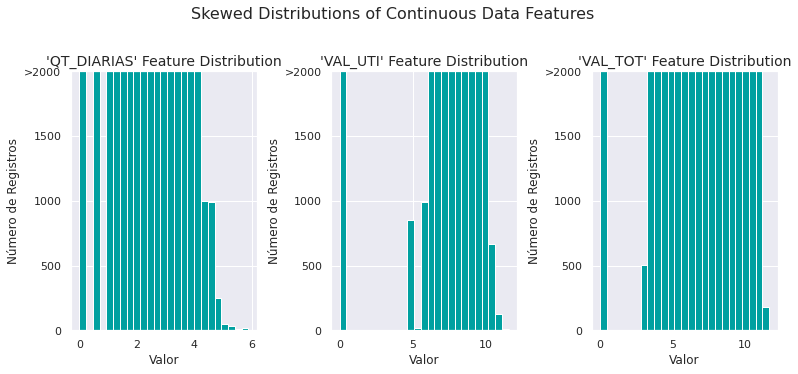

In [59]:
# Aplicação da transformação de log:
colunas_custo_log_transoform = ['QT_DIARIAS', 'VAL_UTI', 'VAL_TOT']
colunas_numericas_custo = ['IDADE', 'QT_DIARIAS', 'VAL_UTI', 'VAL_TOT']


df_custo_log = pd.DataFrame(data = df_custo_morbidades_cid10_dummies)
df_custo_log[colunas_custo_log_transoform] = df_custo_log[colunas_custo_log_transoform].apply(lambda x: np.log(x + 1))

# Visualização das novas distribuições após a transformação.
vs.distribution(df_custo_log, transformed = False, cols = colunas_custo_log_transoform)

# Inicialização do aplicador de escala e aplicação aos atributos
scaler = MinMaxScaler() 

df_custo_morbidades_cid10_raw = pd.DataFrame(data = df_custo_log)
df_custo_morbidades_cid10_raw[colunas_numericas_custo] = scaler.fit_transform(df_custo_log[colunas_numericas_custo])

#Exclusão da variável VAL_TOT, que tinha valores concentrados em uma única classificação:
# df_custo_morbidades_normalizado = df_custo_morbidades_normalizado.drop(['VAL_TOT'], axis = 1)

# Exibição dos 10 primeiros registros com a escala aplicada
# display(df_custo_morbidades_cid10_raw.head(n=10))

#liberar memoria deletando o dataframe original
del df_custo_log
gc.collect()

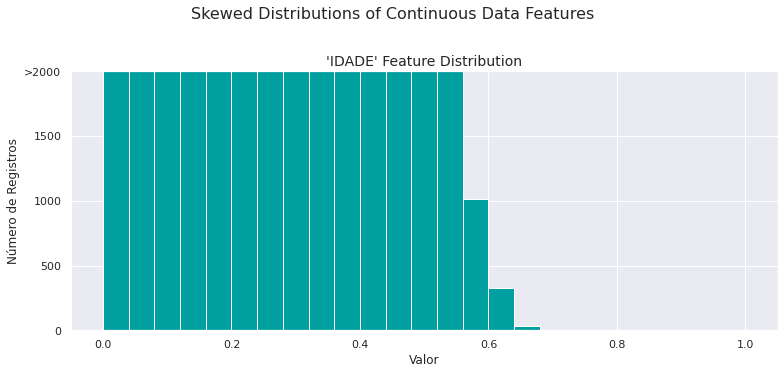

In [60]:
# Aplicação da transformação de log:

# Inicialização do aplicador de escala e aplicação aos atributos
scaler = MinMaxScaler() 

df_morbidade_autorreferida_raw = pd.DataFrame(data = df_morbidade_autorreferida_dummies)
df_morbidade_autorreferida_raw['IDADE'] = scaler.fit_transform(df_morbidade_autorreferida_raw[['IDADE']])

vs.distribution(df_morbidade_autorreferida_raw, transformed = False, cols = ['IDADE'])

# Exibição dos 10 primeiros registros com a escala aplicada
# display(df_morbidade_autorreferida_raw.head(n=10))

In [61]:
# Importação do train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

df =  pd.DataFrame(data = df_custo_morbidades_cid10_raw)
df1 = pd.DataFrame(data = df_morbidade_autorreferida_dummies)
d = df['IND_CUSTO_MEDIO']
df = df_custo_morbidades_cid10_raw.drop(columns=['IND_CUSTO_MEDIO', 'VAL_TOT'])


# Divisão dos 'atributos' e 'H_COST' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    d,
                                                    test_size = 0.3, 
                                                    random_state = 0)
# X_train_at, X_test_at, y_train_at, y_test_at = train_test_split(df1,
#                                                     d[:df1['BODY_SYSTEM_8'].count()],
#                                                     test_size = 0.3, 
#                                                     random_state = 0)

# Mostrando os resultados da divisão dos dados
print ("Conjunto de Treinamento possui {:0,} amostras de custo.".format(X_train.shape[0]))
print ("Conjunto de Testes possui {:0,} amostras  de custo.".format(X_test.shape[0]))

# print ("Conjunto de Treinamento possui {:0,} amostras autorreferidas.".format(X_train_at.shape[0]))
# print ("Conjunto de Testes possui {:0,} amostras autorreferidas.".format(X_test_at.shape[0]))



Conjunto de Treinamento possui 2,032,177 amostras de custo.
Conjunto de Testes possui 870,934 amostras  de custo.


In [62]:
from sklearn import tree
from sklearn.metrics import accuracy_score
#Assume que você tem X (previsor) e Y (alvo) para dados de treino e x_test(previsor) dos dados de teste
#Cria objeto tree
model = tree.DecisionTreeClassifier(criterion='gini') 
#Para classificação, aqui você pode mudar o algoritimo como gini ou entropy (ganho de informação). O default é gini  
# model = tree.DecisionTreeRegressor() for regression
#Treina o modelo usando os dados de treino e confere o score
model.fit(X_train,y_train)
model.score(X_train,y_train)
#Prevê o resultado
predicted= model.predict(X_test)
predicted
accuracy_score (y_true=y_train[:300],y_pred=predicted[:300])

0.7133333333333334

In [63]:
from sklearn.linear_model import LogisticRegression

#from sklearn.svm import SVC

# Inicializando os três modelos
clf_C = LogisticRegression(random_state=100)

start = time() 
clf_C.fit(X_train,y_train)
end = time() 

#Calculando o tempo de treinamento
print(end - start)

# Predições do set de treinamento (X_test)
# Predições das primeiros 300 amostras de treinamento 
start = time() 
clf_C.predict (X_test)
clf_C.predict (X_train)
end = time() 
print(accuracy_score (y_true=y_train[:300],y_pred=predicted[:300]))

11.82235074043274
0.7133333333333334


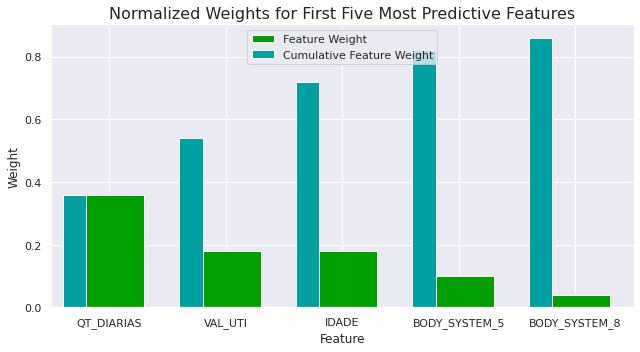

In [64]:
#Extraindo a importância do atributo
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier

# Treinamento do modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)

model = AdaBoostClassifier().fit(X_train,y_train)
#model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
# Extração da importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Gráfico
vs.feature_plot(importances, X_train, y_train)
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

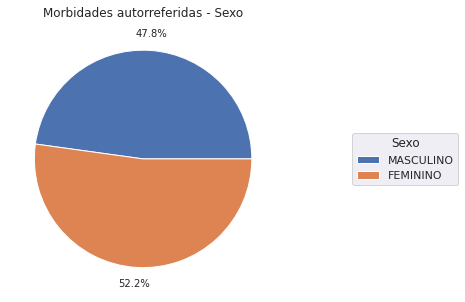

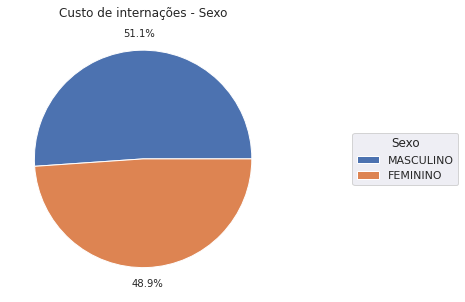

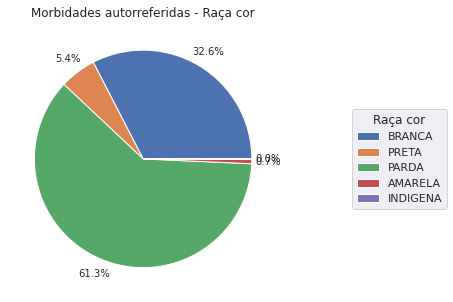

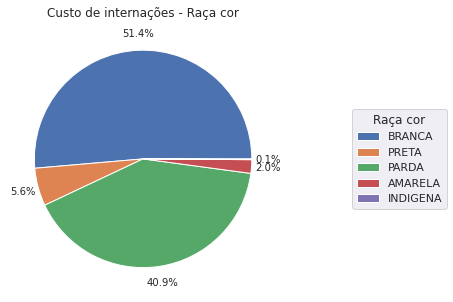

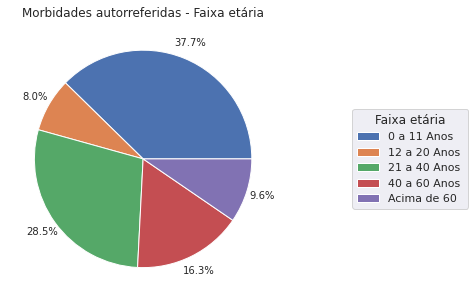

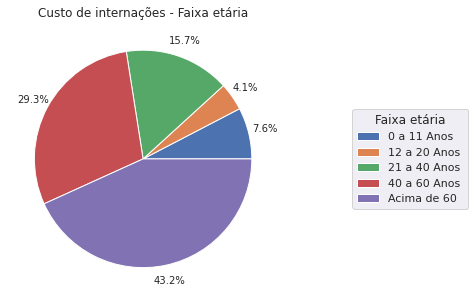

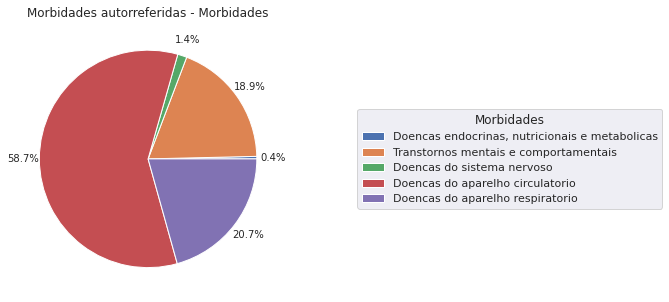

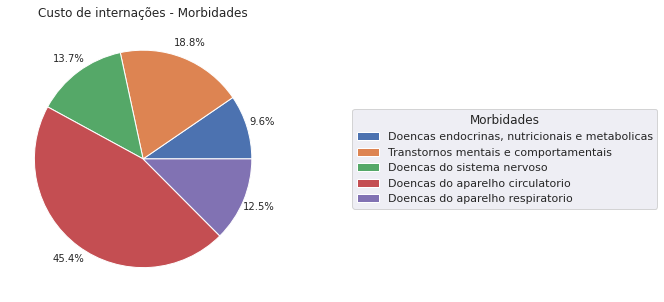

In [124]:
# Morbidads autorreferidas - Graficos de pizza para ver a distribuição dos valores categóricos


#### SEXO
df_graf = df_morbidade_autorreferida.groupby(by="SEXO", dropna=False).sum()['IND_POSSUI_INFO_AUTOREFERIDA']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['MASCULINO', 'FEMININO'], title="Sexo", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Morbidades autorreferidas - Sexo")
plt.show()

df_graf = df_custo_morbidades_cid10.groupby(by="SEXO", dropna=False).count()['IND_CUSTO_MEDIO']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['MASCULINO', 'FEMININO'], title="Sexo", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Custo de internações - Sexo")
plt.show()

#### RAÇA COR
df_graf = df_morbidade_autorreferida.groupby(by="RACA_COR", dropna=False).sum()['IND_POSSUI_INFO_AUTOREFERIDA']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'INDIGENA'], title="Raça cor", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Morbidades autorreferidas - Raça cor")
plt.show()

df_graf = df_custo_morbidades_cid10.groupby(by="RACA_COR", dropna=False).count()['IND_CUSTO_MEDIO']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'INDIGENA'], title="Raça cor", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Custo de internações - Raça cor")
plt.show()

### FAIXA ETARIA
df_graf = df_morbidade_autorreferida.groupby(by="FAIXA_ETARIA", dropna=False).sum()['IND_POSSUI_INFO_AUTOREFERIDA']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['0 a 11 Anos', '12 a 20 Anos', '21 a 40 Anos', '40 a 60 Anos ', 'Acima de 60'], title="Faixa etária", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Morbidades autorreferidas - Faixa etária")
plt.show()

df_graf = df_custo_morbidades_cid10.groupby(by="FAIXA_ETARIA", dropna=False).count()['IND_CUSTO_MEDIO']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(['0 a 11 Anos', '12 a 20 Anos', '21 a 40 Anos', '40 a 60 Anos ', 'Acima de 60'], title="Faixa etária", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Custo de internações - Faixa etária")
plt.show()


### MORBDIADES
colunas = ['SEXO', 'IND_POSSUI_INFO_AUTOREFERIDA','BODY_SYSTEM_3', 'BODY_SYSTEM_5', 'BODY_SYSTEM_6', 'BODY_SYSTEM_7', 'BODY_SYSTEM_8']
dft_un = df_morbidade_autorreferida_raw[colunas].melt(id_vars=['SEXO'], var_name='INFO', value_name='VALUE')
df_graf = dft_un.pivot_table('VALUE', index='INFO', columns=['SEXO'], aggfunc=[lambda x: x.sum()], margins=True)['<lambda>']
valores_grafico_pizza = df_graf['All'][:5].values
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(valores_grafico_pizza, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(df_colunas['DESCRICAO_GRUPO_MORBIDADE'], title="Morbidades", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Morbidades autorreferidas - Morbidades")
plt.show()

df_colunas = df_capitulo_cid_morbidades[df_capitulo_cid_morbidades.BODY_SYSTEM.isin([3, 5, 6, 7, 8])]
df_graf = df_custo_morbidades_cid10[df_custo_morbidades_cid10.BODY_SYSTEM.isin([3, 5, 6, 7, 8])].groupby(by="BODY_SYSTEM", dropna=False).count()['IND_CUSTO_MEDIO']
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(df_graf, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(df_colunas['DESCRICAO_GRUPO_MORBIDADE'], title="Morbidades", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Custo de internações - Morbidades")
plt.show()

